<a href="https://colab.research.google.com/github/runnertyler/MA-Economics/blob/main/P3_Mathews_Tyler_IS6703_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P3 (60pt): The goal of this problem is to predict the MPG value for a vehicle, given that we have other attributes of that vehicle. Write a Python code in Colab using NumPy, Panda, Scikit-Learn to complete the following tasks:

# **Part1: Data Importing and Problem Statement**

In [1]:
import pandas as pd  
import numpy as np  
np.random.seed(100)
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

1. Import the Auto MPG dataset with pandas.read_csv() using the dataset URL, use the attribute names as explained in the dataset description as the column names, view the strings ‘?’ as the missing value, and whitespace (i.e., ‘\s+’) as the column delimiter. Print out the shape and first 5 rows of the obtained DataFrame. **(3pt)**

* Dataset source file:
http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
* Dataset description: http://archive.ics.uci.edu/ml/datasets/Auto+MPG
* To have reproducible results using Scikit-Learn in Jupyter Notebook for the training/testing, you can set the seed at the beginning of your notebook
https://www.mikulskibartosz.name/how-to-set-the-global-random_state-in-scikit-learn/

In [2]:
# input your answer here
cols = ['mpg','cylinders','displacement','horsepower','weight',
                'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                 names=cols, na_values = '?', delimiter='\s+')
print(df.shape)
print(df.head())

(398, 9)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


# **Part2: Exploratory Data Analysis with NumPy, Pandas, Matplotlib, and Seaborn** 

1. Delete the “car_name” column using .drop() method as it is irrelevant to the prediction. Print out a concise summary of the new DataFrame using .info() and check if NULL value exists in each column **(3pt)**

In [ ]:
# put your answer here
#dropping car_name and checking info
df.drop('car_name', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
#checking for NULL
df.isnull().sum()
#This shows that horsepower has 6 null values.

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

2. For the columns with missing value, plot their histograms, and use the median of the column to impute the missing values. After that, print out the concise summary of the new DataFrame using .info() and recheck if NULL value exists in each column **(3pt)**  

(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <a list of 10 Patch objects>)

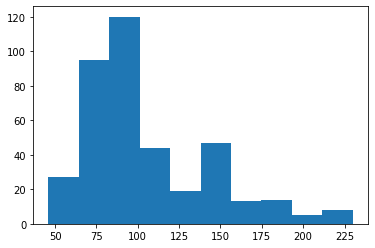

In [ ]:
# put your answer here
#plotting histogram
plt.hist(df['horsepower'])

In [ ]:
#calculating median and imputed into null fields
median = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(median)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


3.	For the categorical column of 'origin' in the dataset. Print out the number of rows that belong to each class in the column **(3pt)** 



In [ ]:
# put your answer here
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

4. Using pair plot to find the correlations between any pair of columns in ["cylinders", "displacement", "weight", "acceleration", "mpg"]. Based on the figure, describe the relationship (e.g., positively correlated or negatively correlated) between the MPG column and other columns. **(3pt)** 

  *   https://seaborn.pydata.org/generated/seaborn.pairplot.html



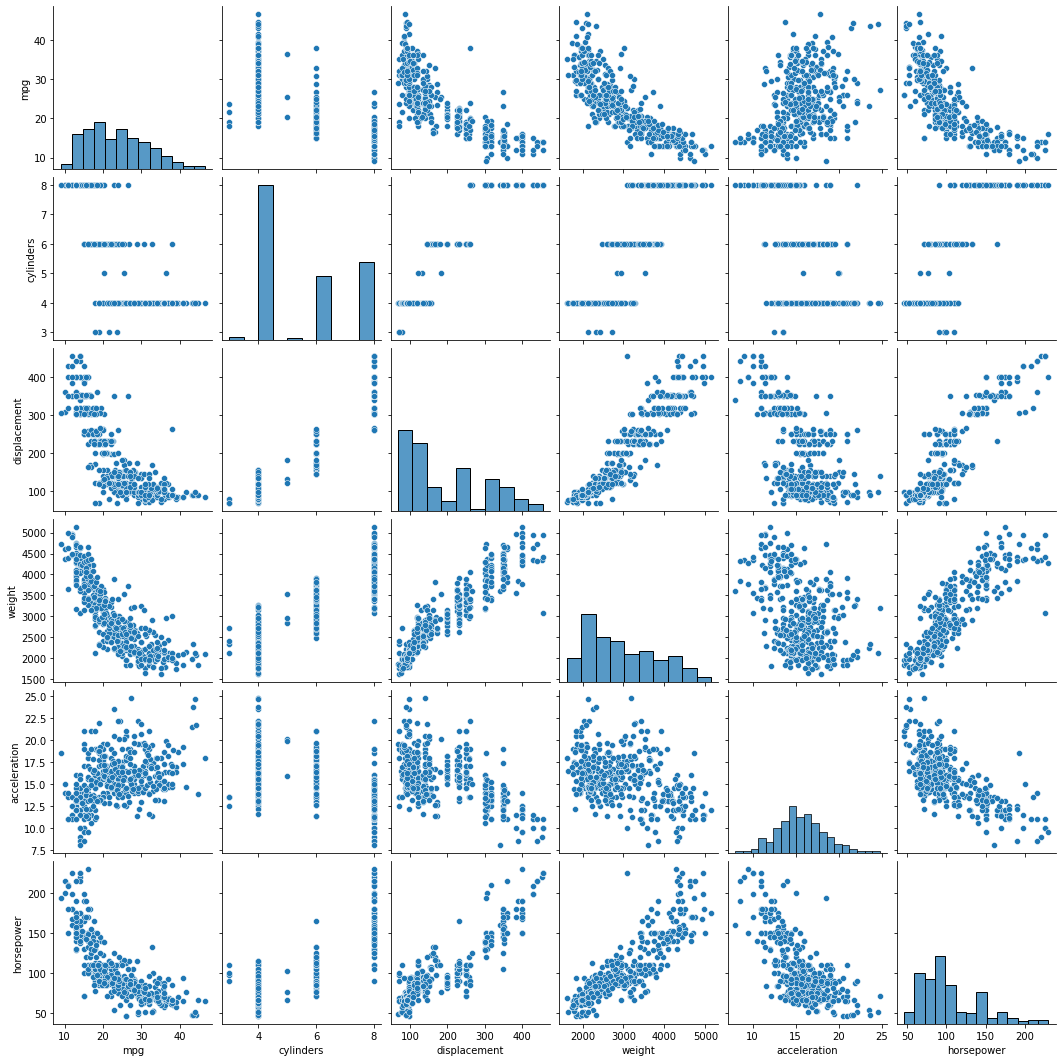

In [ ]:
# put your answer here
import seaborn as sns
sns.pairplot(df[["mpg", "cylinders", "displacement", "weight", "acceleration", "horsepower"]])

MPG-Horsepower: Negative correlation

MPG-Acceleration: Ambiguous, but perhaps slightly positive

MPG-Weight: Negative correlation

MPG-Displacement: Negative correlation

MPG-Cylinder: Negative correlation

5. Create the following four new columns based on the domain knowledge and add them into the original DataFrame. Pirnt out the shape of the new DataFrame. **(3pt)** 

*   DataFrame['displacement_on_power'] = DataFrame['displacement'] / DataFrame['horsepower']
*   DataFrame['weight_on_cylinder'] = DataFrame['weight'] / DataFrame['cylinders']
*   DataFrame['acceleration_on_power'] = DataFrame['acceleration'] / DataFrame['horsepower']
*   DataFrame['acceleration_on_cyl'] = DataFrame['acceleration'] / DataFrame['cylinders']






In [ ]:
# put your answer here
df['displacement_on_power'] = df['displacement']/df['horsepower']
df['weight_on_cylinder'] = df['weight'] / df['cylinders']
df['acceleration_on_power'] = df['acceleration'] / df['horsepower']
df['acceleration_on_cyl'] = df['acceleration'] / df['cylinders']
df.shape

(398, 12)

6. Find the correlation of each column with the 'mpg' column in the new DataFrame using .corr() method in Pandas. Sort the correlation values of each column in the descending order. Based on the sorted result, share your opinion on whether the newly added columns are useful or not. **(3pt)**  
*   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html



In [ ]:
# put your answer here. Use text cell to write your interpretation of the results. 
df.corr().sort_values(by='mpg', ascending=False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,displacement_on_power,weight_on_cylinder,acceleration_on_power,acceleration_on_cyl
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450,-0.577236,-0.020778,0.704240,0.732133
acceleration_on_cyl,0.732133,-0.913462,-0.884569,-0.846458,-0.801469,0.770886,0.342416,0.508619,-0.594729,0.370010,0.867597,1.000000
acceleration_on_power,0.704240,-0.695407,-0.730931,-0.850591,-0.706756,0.843825,0.320542,0.406884,-0.278609,0.034684,1.000000,0.867597
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662,-0.161021,0.162992,0.320542,0.342416
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000,-0.634475,0.035753,0.406884,0.508619
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873,-0.084175,0.218881,0.843825,0.770886
weight_on_cylinder,-0.020778,-0.371772,-0.192330,-0.077308,0.057917,0.218881,0.162992,0.035753,-0.228081,1.000000,0.034684,0.370010
displacement_on_power,-0.577236,0.732550,0.751036,0.398118,0.685536,-0.084175,-0.161021,-0.634475,1.000000,-0.228081,-0.278609,-0.594729
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096,0.398118,-0.077308,-0.850591,-0.846458
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543,0.732550,-0.371772,-0.695407,-0.913462


Acceleration on cylinders and acceleration on power both show a positive correlation with fuel economy (mpg), while weight on cylinder and displacement on power show negative correlations. This would suggest that having a high amount of acceleration with the least amount of cylinders or horsepower implies efficiency that translates to mpg, whereas having a large amount of weight per cylinder and displacement per horsepower has a negative affect on fuel economy. These additional metrics are useful in helping car manufacturers and consumers determine a better target metric for decisions.

# **Part3: Data-Preparation using Sklearn**

1. Transform the categorical variable 'origin' with one-hot-encoding. **(3pt)**  





In [ ]:
# put your answer here.
df = pd.get_dummies(df ,columns=['origin'])
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,displacement_on_power,weight_on_cylinder,acceleration_on_power,acceleration_on_cyl,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,2.361538,438.000,0.092308,1.5000,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,2.121212,461.625,0.069697,1.4375,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,2.120000,429.500,0.073333,1.3750,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,2.026667,429.125,0.080000,1.5000,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,2.157143,431.125,0.075000,1.3125,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.627907,697.500,0.181395,3.9000,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1.865385,532.500,0.473077,6.1500,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.607143,573.750,0.138095,2.9000,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.518987,656.250,0.235443,4.6500,1,0,0


2.  Separate the “mpg” column from other columns and view it as the label vector and others as the feature matrix **(3pt)**

In [ ]:
# put your answer here.
y = df['mpg']
X = df.drop('mpg', axis=1)

print(y.shape)
print(X.shape)

(398,)
(398, 13)


3. Use StandardScaler() to normalize each column of feature matrix. **(3pt)**   

In [ ]:
# put your answer here.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled)
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1.147548,-1.410122,-1.026936,-1.427774,0.773559,-0.461968,-0.497643
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,0.672749,-1.123147,-1.311063,-1.480546,0.773559,-0.461968,-0.497643
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,0.670354,-1.513372,-1.265369,-1.533318,0.773559,-0.461968,-0.497643
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,0.485961,-1.517927,-1.181595,-1.427774,0.773559,-0.461968,-0.497643
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,0.743735,-1.493633,-1.244425,-1.586090,0.773559,-0.461968,-0.497643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,-0.301846,1.742051,0.092543,0.598674,0.773559,-0.461968,-0.497643
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.167325,-0.262221,3.757825,2.498469,-1.292726,2.164651,-0.497643
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,-0.342869,0.238847,-0.451568,-0.245679,0.773559,-0.461968,-0.497643
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,-0.517033,1.240983,0.771708,1.231939,0.773559,-0.461968,-0.497643


4. Split the dataset into a training set (80%) and testing set (20%) using train_test_split and print out their shapes **(3pt)**

In [ ]:
# put your answer here.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=76)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 13)
(80, 13)
(318,)
(80,)


# **Part4: Selecting, Training, and Fine-tuning Machine Learning Models in Sklearn**

1. Create the following four models and use 5-fold cross-validation to train and cross-validate the models on the training dataset. Print out the averaged Root Mean Squared Error (typical performance metric for regression problems) across 5 folds for each model. **(7 pt)**
  * Linear Regression
  * Decision Tree Regressor
  * Random Forest Regressor
  * SVM Regressor

  Note that you can use the default setting when instantiating each model. 





In [ ]:
# put your answer here.
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
-lin_scores

array([2.84931318, 2.57816798, 3.58113467, 3.1456147 , 2.88524233])

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
fitted_tree = tree.fit(X_train, y_train)
tree_scores = cross_val_score(fitted_tree, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
-tree_scores

array([2.85588756, 3.95506005, 5.26585404, 4.20664629, 3.04104201])

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=0)
fitted_forest = forest.fit(X_train, y_train)
forest_scores = cross_val_score(fitted_forest, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
-forest_scores

array([2.36527312, 2.45463268, 3.51239398, 3.2738663 , 2.64356458])

In [ ]:
#SVM
from sklearn.svm import LinearSVR
svm = LinearSVR(random_state=0)
fitted_svm = svm.fit(X_train, y_train)
svm_scores = cross_val_score(fitted_svm, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
-svm_scores

array([2.87921269, 2.56553776, 3.65706262, 3.25899679, 2.85501356])

2. Use GridSearchCV() to find and print out the best hyperparameter combination for the number of trees (try the following values: 3, 10, 30 for ‘n_estimator') and number of features to consider when looking for the best split (try the following values: 2, 4, 6, 8 for 'max_features') in Random Forest Regressor, ignoring the search for other hyperparameters. Also use 5-fold cross-validation during GridSearchCV. **(7 pt)**

In [ ]:
# put your answer here.


from sklearn.model_selection import GridSearchCV
grid_param = {
    'n_estimators': [3, 10, 30],
    'max_features': [2,4,6,8]
}

gd_sr = GridSearchCV(estimator=forest,
                     param_grid=grid_param,
                     scoring='neg_root_mean_squared_error',
                     cv=5)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(-best_result)

{'max_features': 8, 'n_estimators': 30}
2.8727471391302104


3. Print out the feature importance of each feature (with the feature name) in the learned Random Forest model as a dictionary. **(10 pt)** 


*   https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html



In [ ]:
# put your answer here.
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance
feats

{'acceleration': 0.008815679269411408,
 'acceleration_on_cyl': 0.01673716739250156,
 'acceleration_on_power': 0.02965000743726251,
 'cylinders': 0.11584327399892322,
 'displacement': 0.3279684024012352,
 'displacement_on_power': 0.01593308987313582,
 'horsepower': 0.10782629324423958,
 'model_year': 0.1107662997906799,
 'origin_1': 0.0013322307556342563,
 'origin_2': 0.0012866342993813839,
 'origin_3': 0.002398200891528514,
 'weight': 0.22587331964510202,
 'weight_on_cylinder': 0.035569401000964646}

# **Part5: Evaluate the Entire System**

1. Evaluate the Random Forest Regressor with the best hyperparameter combination on the test set and print out the mean squared error of the predictions.  **(3 pt)** 

In [ ]:
forest = RandomForestRegressor(random_state=0, n_estimators=30, max_features=8)
fitted_forest = forest.fit(X_train, y_train)
y_preds = fitted_forest.predict(X_test)
mean_squared_error(y_test, y_preds)

7.189044444444447